### Ranveer Singh

In [148]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

### Analysing the Data

In [149]:
# Reading data from csv
housingDf= pd.read_csv('train.csv')
housingDf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [150]:
# shape
housingDf.shape

(1460, 81)

In [151]:
# Checking dataframe info
housingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [152]:
# descriptive stats
housingDf.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Data Trasformation

In [153]:
## missing data check
missingInfo= round(housingDf.isna().sum() * 100/housingDf.shape[0], 2)
missingInfo[missingInfo > 0].sort_values(ascending= False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType      5.55 
GarageYrBlt     5.55 
GarageFinish    5.55 
GarageQual      5.55 
GarageCond      5.55 
BsmtExposure    2.60 
BsmtFinType2    2.60 
BsmtFinType1    2.53 
BsmtCond        2.53 
BsmtQual        2.53 
MasVnrArea      0.55 
MasVnrType      0.55 
Electrical      0.07 
dtype: float64

- Above 19 columns have missing values.

In [154]:
# Replacing NaN with 'Missing Value' for below columns
validNaCols= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
housingDf[validNaCols]= housingDf[validNaCols].fillna('Missing Value')

In [155]:
# column names with missing values
missingValCols= missingInfo[missingInfo > 0].sort_values(ascending= False).index
missingValCols

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [156]:
# Checking percentage of missing values again
missingInfo= round(housingDf.isna().sum() * 100/housingDf.shape[0], 2)
missingInfo[missingInfo > 0].sort_values(ascending= False)

LotFrontage    17.74
GarageYrBlt    5.55 
MasVnrType     0.55 
MasVnrArea     0.55 
Electrical     0.07 
dtype: float64

In [157]:
# Checking if there is any relation between GarageYrBlt and GarageType
housingDf[housingDf.GarageYrBlt.isna()]['GarageType'].value_counts(normalize= True)

Missing Value    1.0
Name: GarageType, dtype: float64

In [158]:
# Imputing missing values of GarageYrBlt column
housingDf['GarageYrBlt']= housingDf['GarageYrBlt'].fillna(0)

Lets perform statistical imputation for other columns after train-test split: **LotFrontage, MasVnrArea, MasVnrType, Electrical**

###  data types update

MSSubClass:  "identifies the type of dwelling involved in the sale", is a categorical variable, but it's appearing as a numeric variable.

In [159]:
# Changing data type of MSSubClass
housingDf['MSSubClass']= housingDf['MSSubClass'].astype('object')

### EDA

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

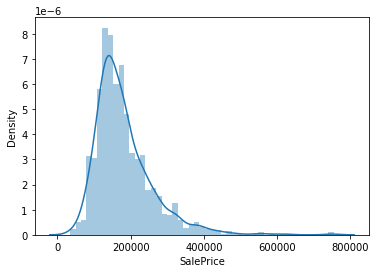

In [160]:
# Checking distribution of SalePrice
sns.distplot(housingDf['SalePrice'])

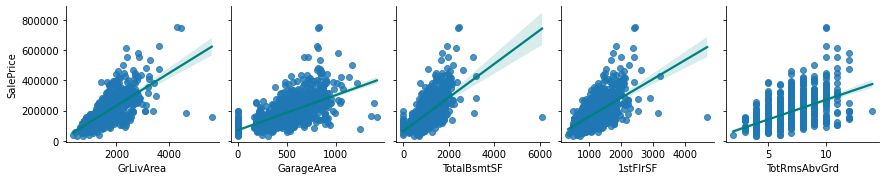

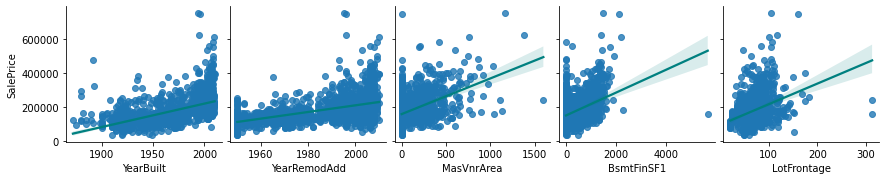

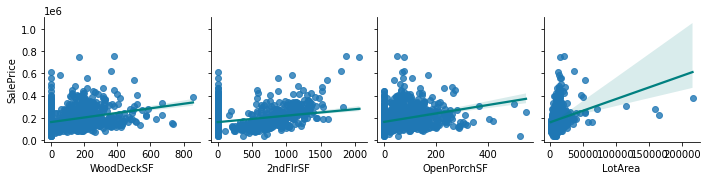

In [161]:
# numeric variables vs SalePrice Plotting

numericCols= ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea']

sns.pairplot(housingDf, x_vars=['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(housingDf, x_vars=['YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','LotFrontage'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(housingDf, x_vars=['WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})

### categorical variables:

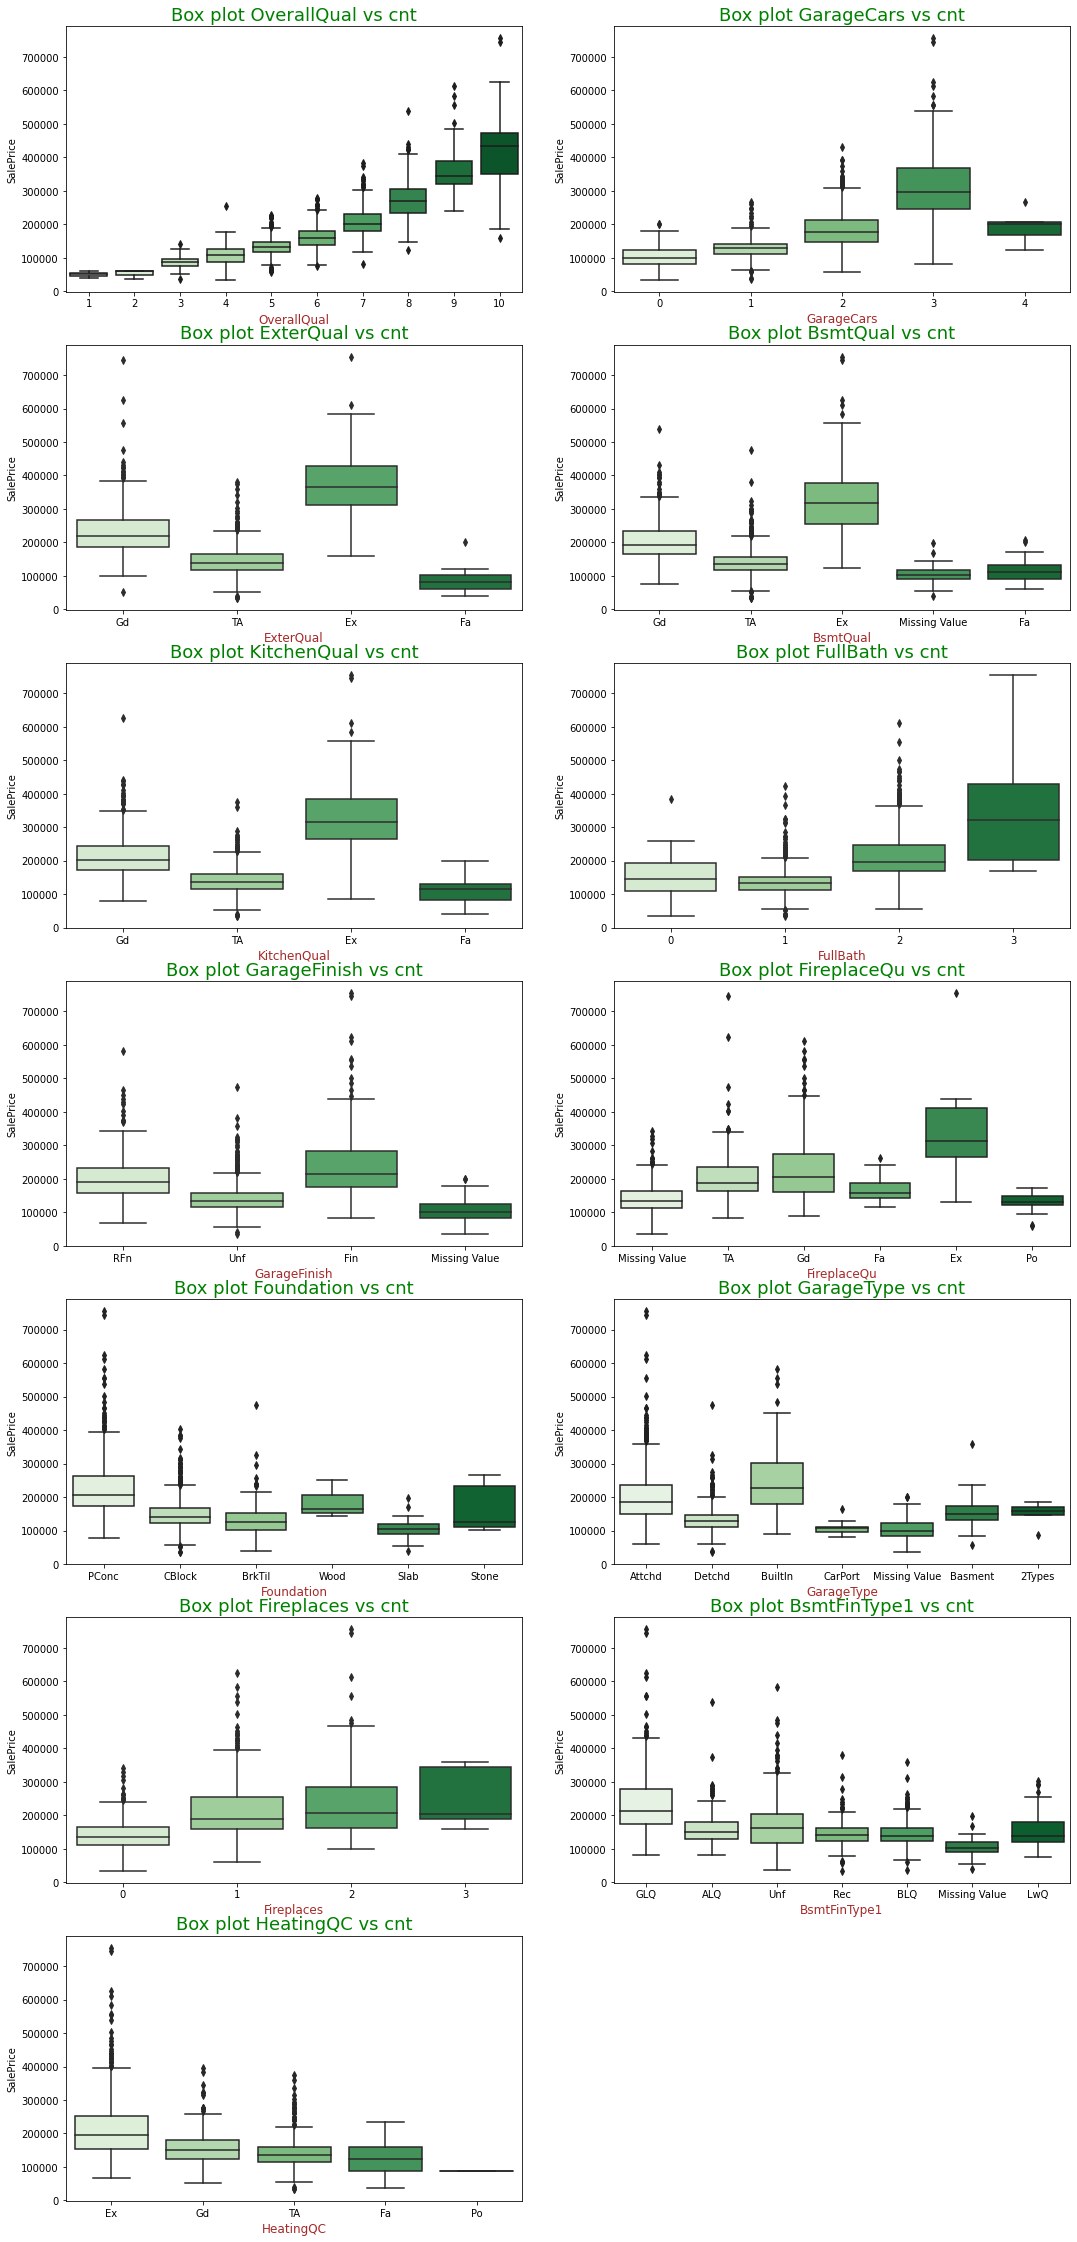

In [162]:
# Box plot of categories

catCols= ['OverallQual','GarageCars','ExterQual','BsmtQual','KitchenQual','FullBath','GarageFinish','FireplaceQu','Foundation','GarageType','Fireplaces','BsmtFinType1','HeatingQC']

plt.figure(figsize=[18, 40])

for i, col in enumerate(catCols, 1):
    plt.subplot(7,2,i)
    title_text= f'Box plot {col} vs cnt'
    x_label= f'{col}'
    fig= sns.boxplot(data= housingDf, x= col, y= 'SalePrice', palette= 'Greens')
    fig.set_title(title_text, fontdict= { 'fontsize': 18, 'color': 'Green'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12, 'color': 'Brown'})
plt.show()

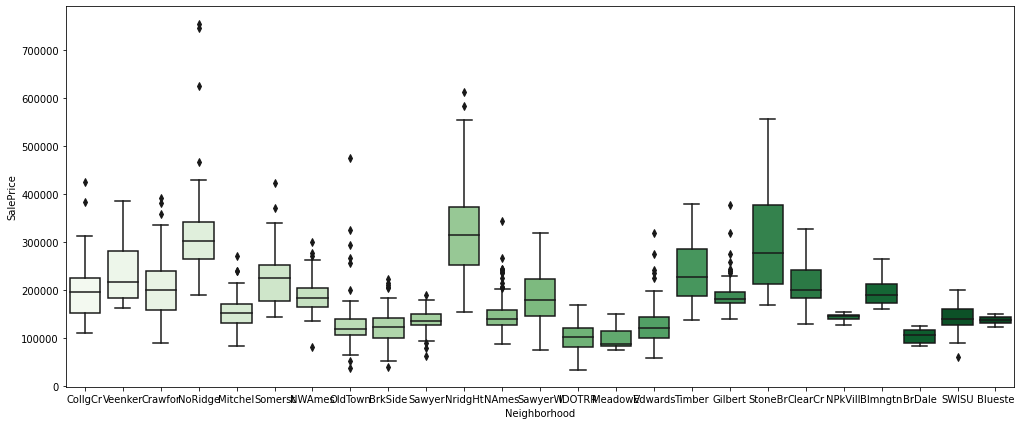

In [163]:
plt.figure(figsize=[17,7])
sns.boxplot(data= housingDf, x= 'Neighborhood', y= 'SalePrice', palette= 'Greens')
plt.show()

### Inferences

- SalePrice is right sckewed and other numeic feature: 
- Median SalePrice is higher for the houses with higher OverallQual rating. Houses with Excellent quality of the material on the exterior have highest price. Price reduces as quality decreases.
- SalePrice is high for houses having Neighbourhood : Northridge Heights, Stone Brook, Northridge. price is comparatively lower in Iowa DOT and Rail Road, Meadow Village neighbourhood.
- SalePrice is high for houses with 3 Full bathrooms above grade.

### Correlation

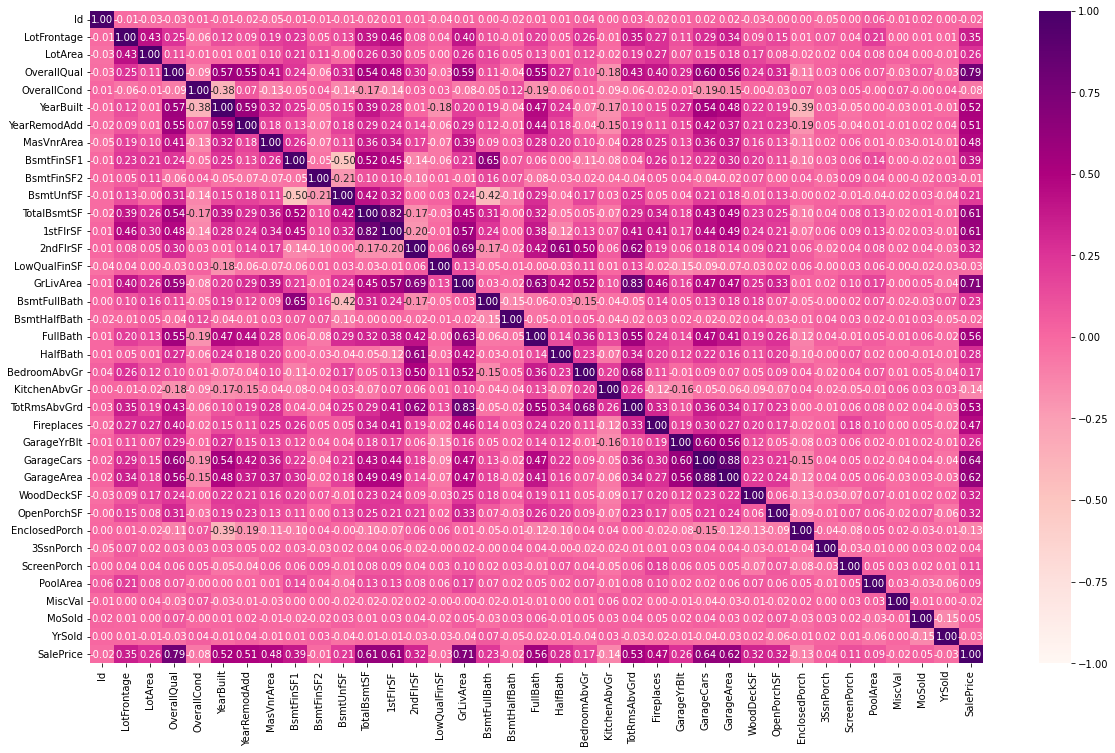

In [164]:
# correlation heatmap
plt.figure(figsize = (20, 12))
sns.heatmap(housingDf.corr(), annot= True, cmap= 'RdPu', fmt= '.2f', vmin= -1, vmax= 1)
plt.show()

Below features have very high correlation coefficients.
- GrLivArea and TotRmsAbvGrd= .83
- GarageCars and GarageArea= .88

In [165]:
# Dropping GarageCars and TotRmsAbvGrd
housingDf.drop(['GarageCars','TotRmsAbvGrd'], axis= 1, inplace= True)
housingDf.shape

(1460, 79)

In [166]:
housingDfOrg= housingDf.copy()

### Preparating Data

Target variable SalePrice is heavily right skewed. We can perform log transformation to remove the skewness.

#### Transforming the Target variable

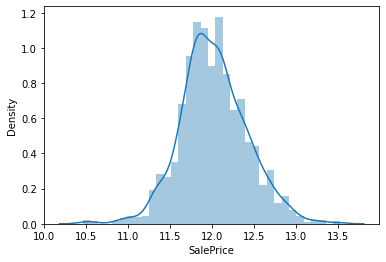

In [167]:
# log transformed SalePrice
sns.distplot(np.log(housingDf['SalePrice']))
plt.show()

In [168]:
# Transforming 'SalePrice'
housingDf['SalePriceLogTrans']= np.log(housingDf['SalePrice'])

### Train-Test split

In [169]:
# Train-Test Split
Y= housingDf['SalePriceLogTrans']
X= housingDf.drop('SalePriceLogTrans', axis= 1)

XTrain, XTest, YTrain, YTest= train_test_split(X, Y, train_size= .7, random_state= 42)

In [170]:
# Getting index values of train test dataset
trainIndex= XTrain.index
testIndex= XTest.index

### Imputation of missing values

In [171]:
# Statistical Imputation for missing values

housingDf['LotFrontage'].fillna(XTrain['LotFrontage'].median(), inplace= True)
housingDf['LotFrontage'].fillna(XTrain['LotFrontage'].median(), inplace= True)

housingDf['MasVnrArea'].fillna(XTrain['MasVnrArea'].median(), inplace= True)
housingDf['MasVnrArea'].fillna(XTrain['MasVnrArea'].median(), inplace= True)

housingDf['MasVnrType'].fillna(XTrain['MasVnrType'].mode(), inplace= True)
housingDf['MasVnrType'].fillna(XTrain['MasVnrType'].mode(), inplace= True)

housingDf['Electrical'].fillna(XTrain['Electrical'].mode(), inplace= True)
housingDf['Electrical'].fillna(XTrain['Electrical'].mode(), inplace= True)

In [172]:
# Getting object and numeric type columns
housingCat= housingDf.select_dtypes(include= 'object')
housingNum= housingDf.select_dtypes(exclude= 'object')
housingCat.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1459,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,3,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,7,6,7,4,6,6,3,4,5,5,9,6
top,20,RL,Pave,Missing Value,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Missing Value,Attchd,Unf,TA,TA,Y,Missing Value,Missing Value,Missing Value,WD,Normal
freq,536,1151,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,690,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [173]:
# 'Street','Utilities', 'CentralAir' have 2 unique data, so we are encoding with 0 and 1
housingDf['Street']= housingDf.Street.map(lambda x: 1 if x== 'Pave' else 0)
housingDf['Utilities']= housingDf.Utilities.map(lambda x: 1 if x== 'AllPub' else 0)
housingDf['CentralAir']= housingDf.CentralAir.map(lambda x: 1 if x== 'Y' else 0)

In [174]:
# Performing get_dummies
catCols= housingCat.columns.tolist()
done_encoding= ['Street','Utilities', 'CentralAir']
catCols= [col for col in catCols if col not in done_encoding]
dummies= pd.get_dummies(housingDf[catCols], drop_first=True)

In [175]:
# Checking all dummies
dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Missing Value,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing Value,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Missing Value,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Missing Value,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing Value,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing Value,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing Value,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing Value,GarageFinish_Missing Value,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Missing Value,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Missing Value,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing Value,Fence_GdWo,Fence_Missing Value,Fence_MnPrv,Fence_MnWw,MiscFeature_Missing Value,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1

In [176]:
# Concatinating dummies with housingDf dataframe and droping original features
print('original valiables : housingDf before droping :', housingDf.shape)
print('dummy dataframe Shaoe:', dummies.shape)
housingDf.drop(catCols, axis=1, inplace= True)
housingDf= pd.concat([housingDf, dummies], axis= 1)
print('housingDf Final : ', housingDf.shape)

original valiables : housingDf before droping : (1460, 80)
dummy dataframe Shaoe: (1460, 234)
housingDf Final :  (1460, 273)


### Scaling numeric fields

In [177]:
# Re-creating Train-test data
XTrain= housingDf.iloc[trainIndex, :].drop('SalePriceLogTrans', axis= 1)
YTrain= housingDf.iloc[trainIndex, :]['SalePriceLogTrans']
XTest= housingDf.iloc[trainIndex, :].drop('SalePriceLogTrans', axis= 1)
YTest= housingDf.iloc[trainIndex, :]['SalePriceLogTrans']

In [178]:
# Scaling on numeric columns in training and test dataset using RobustScaler
numCols= housingNum.columns.tolist()
numCols.remove('SalePriceLogTrans')
scaler= RobustScaler(quantile_range=(2, 98))
scaler.fit(XTrain[numCols])
XTrain[numCols]= scaler.transform(XTrain[numCols])
XTest[numCols]= scaler.transform(XTest[numCols])

In [179]:
XTrain[numCols].head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1452,0.509450,-0.360825,-0.255342,-0.2,0.0,0.318533,0.186441,0.126743,0.109760,0.000000,-0.290195,-0.224128,-0.016273,0.000000,0.0,-0.202350,1.0,0.0,-0.5,0.0,-0.333333,0.0,-0.5,0.013446,0.045214,0.000000,0.003912,0.0,0.0,0.0,0.0,0.0,-0.090909,-0.50,-0.064041
762,0.019184,0.020619,-0.041372,0.2,0.0,0.357143,0.254237,0.000000,-0.255872,0.000000,0.149603,-0.119334,-0.225115,0.583197,0.0,0.036152,0.0,0.0,0.0,1.0,0.000000,0.0,-0.5,0.015438,0.143361,0.367391,0.070423,0.0,0.0,0.0,0.0,0.0,0.000000,0.50,0.160743
932,0.139974,0.144330,0.089208,0.6,0.0,0.328185,0.203390,0.478454,-0.272651,0.000000,0.854362,0.456779,0.548549,0.000000,0.0,0.215907,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.013944,0.335245,0.000000,0.641628,0.0,0.0,0.0,0.0,0.0,-0.272727,-0.25,0.496318
435,-0.213159,-0.278351,0.045983,0.2,0.2,0.231660,0.033898,0.000000,-0.003496,0.559168,-0.248137,-0.097774,-0.182398,0.621183,0.0,0.093392,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.008964,0.072783,0.343478,0.133020,0.0,0.0,0.0,0.0,0.0,-0.181818,0.25,0.150496
629,-0.075316,0.123711,-0.024995,0.0,0.0,-0.077220,-0.508475,0.410330,0.163591,0.546164,-0.117159,0.127357,0.172227,0.000000,0.0,-0.062764,1.0,0.0,-0.5,1.0,0.000000,0.0,-0.5,-0.006972,0.039700,0.382609,-0.105634,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.011207


### Variance Thresholding

Remvoing those categorical features having zero or close to zero variance.

In [180]:
varT= VarianceThreshold(threshold= .003)
variance_thresh= varT.fit(XTrain)
colIndx= varT.get_support()

# Below columns have very low variance
XTrain.loc[:, ~colIndx].columns

Index(['Utilities', 'MSSubClass_40', 'LotConfig_FR3', 'Neighborhood_Blueste',
       'Condition1_RRNe', 'Condition2_Feedr', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'RoofStyle_Shed', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_WdShake',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Stone',
       'ExterCond_Po', 'Foundation_Wood', 'BsmtCond_Po', 'Heating_OthW',
       'Heating_Wall', 'HeatingQC_Po', 'Electrical_FuseP', 'Electrical_Mix',
       'Functional_Sev', 'GarageQual_Po', 'GarageCond_Po', 'PoolQC_Fa',
       'PoolQC_Gd', 'MiscFeature_Othr', 'MiscFeature_TenC', 'SaleType_Con',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth'],
      dtype='object')

In [181]:
# attributes/categorical value in dataset
housingDfOrg.Functional.value_counts()

Typ     1360
Min2    34  
Min1    31  
Mod     15  
Maj1    14  
Maj2    5   
Sev     1   
Name: Functional, dtype: int64

In [182]:
# Removing above columns from train and test dataset
XTrain= XTrain.loc[:, colIndx]
XTest= XTest.loc[:, colIndx]

In [183]:
# Checking shape of final training dataset
XTrain.shape

(1021, 228)

### Building Model

### Ridge Regression

In [184]:
# alpha Values
range1= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
range2= list(range(2, 1001))
range1.extend(range2)
params_grid= {'alpha': range1}

In [185]:

ridge= Ridge(random_state= 42)
gcv_ridge= GridSearchCV(estimator= ridge, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)      
gcv_ridge.fit(XTrain, YTrain)

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [187]:
# estimator 
gcv_ridge.best_estimator_

Ridge(alpha=0.3, random_state=42)

In [188]:
#  MAE
gcv_ridge.best_score_

-0.06087917548163816

Optimal value for alpha is 8.

In [190]:
# Fitting model using estimator
ridgeModel= gcv_ridge.best_estimator_
ridgeModel.fit(XTrain, YTrain)

Ridge(alpha=0.3, random_state=42)

In [191]:
# Evaluating on training dataset
yTrainPred= ridge_model.predict(XTrain)
print( 'r2 score on training dataset:', r2_score(YTrain, yTrainPred))
print( 'MSE on training dataset:', mean_squared_error(YTrain, yTrainPred))
print( 'RMSE on training dataset:', (mean_squared_error(YTrain, yTrainPred)**.5))
print( 'MAE on training dataset:', mean_absolute_error(YTrain, yTrainPred))

r2 score on training dataset: 0.9772447757389193
MSE on training dataset: 0.0035306108302246334
RMSE on training dataset: 0.05941894336173131
MAE on training dataset: 0.041489374429178265


In [192]:
# Evaluating on testing dataset
YTestPred= ridge_model.predict(XTest)
print( 'r2 score on testing dataset:', r2_score(YTest, YTestPred))
print( 'MSE on testing dataset:', mean_squared_error(YTest, YTestPred))
print( 'RMSE on testing dataset:', (mean_squared_error(YTest, YTestPred)**.5))
print( 'MAE on testing dataset:', mean_absolute_error(YTest, YTestPred))

r2 score on testing dataset: 0.9772447757389193
MSE on testing dataset: 0.0035306108302246334
RMSE on testing dataset: 0.05941894336173131
MAE on testing dataset: 0.041489374429178265


In [193]:
# Ridge coefficients
ridge_model.coef_

array([-4.87224803e-03,  1.19186715e-02, -1.88473895e-03, -4.85192951e-02,
        7.67555769e-02,  7.56612276e-02,  7.56859930e-02,  3.68944665e-02,
       -2.49246012e-02, -2.32392815e-02,  1.24528441e-02, -6.85092669e-03,
       -1.85435023e-02,  5.87630095e-02,  7.76113868e-02, -2.05595208e-02,
        2.61466745e-04,  4.36123328e-02,  1.74739290e-02,  2.91263212e-03,
        2.42291516e-02,  2.68585224e-02,  6.47291216e-02, -1.51260523e-02,
       -4.92513195e-03, -1.66326755e-03,  4.59114010e-02,  2.37972808e-02,
        6.30302396e-03,  2.92859962e-02,  4.73929946e-05,  1.92011006e-02,
       -7.75885589e-05, -2.41382196e-03,  1.86738283e-02, -4.98532747e-03,
        1.06375922e+00, -7.59069923e-02, -9.89672245e-02, -1.71885275e-02,
       -2.97818394e-02,  1.30477671e-02, -3.26983563e-02, -1.06982399e-02,
        2.80573594e-02,  6.58605482e-03,  2.71643353e-02, -6.05860925e-02,
        2.02868224e-03, -2.14744828e-02,  1.43507697e-01,  1.51828743e-01,
        1.45916587e-01,  

In [194]:
# Ridge intercept
ridge_model.intercept_

11.529008863761849

In [195]:
# Top 10 features with double the value of optimal alpha in Ridge
ridgeCoef= pd.Series(ridgeModel.coef_, index= XTrain.columns)
top_25_ridge=  ridgeCoef[abs(ridgeCoef).nlargest(25).index]
top_25_ridge

SalePrice               1.063759
Heating_Grav           -0.206067
Functional_Maj2        -0.188943
GarageCond_Fa          -0.156357
MSZoning_RH             0.151829
MSZoning_RL             0.145917
MSZoning_FV             0.143508
GarageCond_TA          -0.136995
PoolQC_Missing Value    0.129022
MSZoning_RM             0.124415
Neighborhood_MeadowV   -0.121395
Exterior2nd_ImStucc    -0.110067
GarageCond_Gd          -0.108419
Exterior2nd_Brk Cmn    -0.107977
SaleCondition_Alloca    0.107289
MSSubClass_45          -0.098967
HouseStyle_2.5Unf       0.087990
SaleType_ConLD          0.087739
GarageQual_TA           0.084287
GarageQual_Fa           0.082083
GarageQual_Gd           0.081310
Neighborhood_ClearCr    0.078537
1stFlrSF                0.077611
OverallQual             0.076756
Exterior2nd_BrkFace    -0.076683
dtype: float64

### Lasso Regression

In [196]:
# Applying Lasso

params_grid= {'alpha': range1}
lasso= Lasso(random_state= 42)
lasso_gcv= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(XTrain, YTrain)         

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Estimator 
lasso_gcv.best_estimator_

In [198]:
# MAE
lasso_gcv.best_score_

-0.0547602051858454

Optimal value for alpha is .0001. Next I'll try to fine tune this value by running GridSearchCV with some closer values to .0001

In [199]:
range3= [0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.0001, .0002, .0003, .0004, .0005, .0006, .0007, .0008, .0009, .001]
params_grid= {'alpha': range3}
lasso_gcv= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(XTrain, YTrain)     

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001,
                                   0.0002, 0.0003, 0.0004, 0.0005, 0.0006,
                                   0.0007, 0.0008, 0.0009, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [200]:
# estimator 
lasso_gcv.best_estimator_

Lasso(alpha=0.0005, random_state=42)

So, for Lasso we are getting optimal value of alpha as .0006.

In [201]:
# Fitting model using best_estimator_
lasso_model= lasso_gcv.best_estimator_
lasso_model.fit(XTrain, YTrain)

Lasso(alpha=0.0005, random_state=42)

In [202]:
# Evaluating on training dataset
YTrainPred= lasso_model.predict(XTrain)
print( 'r2 score on training dataset:', r2_score(YTrain, YTrainPred))
print( 'MSE on training dataset:', mean_squared_error(YTrain, YTrainPred))
print( 'RMSE on training dataset:', (mean_squared_error(YTrain, YTrainPred)**.5))
print( 'MAE on training dataset:', mean_absolute_error(YTrain, YTrainPred))

r2 score on training dataset: 0.9686966950589411
MSE on training dataset: 0.004856897307567046
RMSE on training dataset: 0.0696914435749974
MAE on training dataset: 0.045436397042787215


In [203]:
# Evaluating on testing dataset
YTestPred= lasso_model.predict(XTest)
print( 'r2 score on testing dataset:', r2_score(YTest, YTestPred))
print( 'MSE on testing dataset:', mean_squared_error(YTest, YTestPred))
print( 'RMSE on testing dataset:', (mean_squared_error(YTest, YTestPred)**.5))
print( 'MAE on testing dataset:', mean_absolute_error(YTest, YTestPred))

r2 score on testing dataset: 0.9686966950589411
MSE on testing dataset: 0.004856897307567046
RMSE on testing dataset: 0.0696914435749974
MAE on testing dataset: 0.045436397042787215


In [204]:
# Checking no. of features in Ridge and Lasso models
lasso_coef= pd.Series(lasso_model.coef_, index= XTrain.columns)
selected_features= len(lasso_coef[lasso_coef != 0])
print('Features selected by Lasso:', selected_features)
print('Features present in Ridge:', XTrain.shape[1])

Features selected by Lasso: 94
Features present in Ridge: 228


In [205]:
# Lasso intercept
lasso_model.intercept_

11.803455354921798

In [206]:
# Top 25 features with coefficients in Lasso model
top25_features_lasso=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(25).index]
top25_features_lasso

SalePrice                    1.107062
GarageType_Missing Value    -0.098966
OverallQual                  0.091277
MSSubClass_30               -0.085332
OverallCond                  0.075885
BedroomAbvGr                 0.070650
Neighborhood_MeadowV        -0.065354
CentralAir                   0.064651
1stFlrSF                     0.048700
Neighborhood_NoRidge        -0.046121
Heating_Grav                -0.045216
YearRemodAdd                 0.041663
MSSubClass_160              -0.040159
Neighborhood_ClearCr         0.040098
Neighborhood_Crawfor         0.037470
BsmtCond_Gd                  0.035817
FireplaceQu_Missing Value   -0.034214
BsmtQual_Gd                  0.032902
BsmtCond_TA                  0.031955
GarageArea                   0.030266
Fence_GdWo                  -0.025914
Alley_Pave                   0.025417
ExterQual_Gd                 0.025336
MSZoning_RM                 -0.025191
FullBath                     0.024625
dtype: float64

### Conclusion

- Ridge and Lasso both the models have almost same test and train accuracy. So it can be said that there is no overfitting.
- Lasso and Ridge both have similar r2 score and MAE on test dataset. But Lasso has eliminated 110 features and final no. of features in Lasso Regression model is 116. Where Ridge has all 226 features. So, our Lasso model is simpler than Ridge with having similar r2 score and MAE.
    - Ridge Regression model on test dataset: r2 score= 0.8912, MAE= 0.0934, RMSE= 0.1357
    - Lasso Regression model on test dataset: r2 score= 0.8947, MAE= 0.0914, RMSE= 0.1335
     
- Considering above points we can choose our Lasso Regression model as our final model.
- Below are the top 25 features in the Lasso regression model.

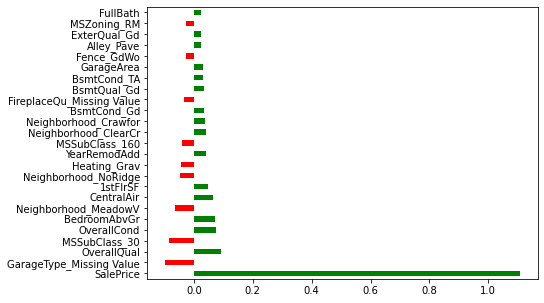

In [207]:
# Ploting top 25 features
plt.figure(figsize= (7, 5))
top25_features_lasso.plot.barh(color= (top25_features_lasso > 0).map({True: 'g', False: 'r'}))
plt.show()

- Optimal alpha (lambda) value for Ridge Regression model is: 8
- Optimal alpha (lambda) value for Lasso Regression model is: 0.0006

---

---
# Assignment II
---

### Scenario 1:  Doubling the value of optimal alpha

In [98]:
## Doubling value of optimal alpha in Ridge
ridge2= Ridge(alpha= 16, random_state= 42)
ridge2.fit(XTrain, YTrain)

Ridge(alpha=16, random_state=42)

In [100]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef2= pd.Series(ridge2.coef_, index= XTrain.columns)
top10_ridge2=  ridge_coef2[abs(ridge_coef2).nlargest(10).index]
top10_ridge2

SalePrice        0.448102
OverallQual      0.146772
GrLivArea        0.098634
OverallCond      0.090733
1stFlrSF         0.076373
MSSubClass_30   -0.074771
GarageArea       0.074529
BedroomAbvGr     0.067447
FullBath         0.064374
CentralAir       0.062897
dtype: float64

In [101]:
## Doubling value of optimal alpha in Lasso
lasso2= Lasso(alpha= .0012, random_state=42)
lasso2.fit(XTrain, YTrain)

Lasso(alpha=0.0012, random_state=42)

In [102]:
# Top 10 features with double the value of optimal alpha in Lasso
lasso_coef2= pd.Series(lasso2.coef_, index= XTrain.columns)
top10_lasso2=  lasso_coef2[abs(lasso_coef2[lasso_coef2 != 0]).nlargest(10).index]
top10_lasso2

SalePrice                    1.104984
OverallQual                  0.106895
GarageType_Missing Value    -0.102781
MSSubClass_30               -0.076909
CentralAir                   0.069400
OverallCond                  0.068848
BedroomAbvGr                 0.062928
YearRemodAdd                 0.042968
MSZoning_RM                 -0.039792
FireplaceQu_Missing Value   -0.036213
dtype: float64

### Scenario 2: 5 most important predictor variables in the lasso model are not available in the incoming data

In [103]:
# Checking top 5 features in our lasso model
top25_features_lasso.nlargest()

SalePrice       1.107062
OverallQual     0.091277
OverallCond     0.075885
BedroomAbvGr    0.070650
CentralAir      0.064651
dtype: float64

As Neighborhood_StoneBr is a dummy variable, we'll drop entire Neighborhood feature.

In [105]:
# Checking all Neighborhood dummy variables
cols_to_drop= XTrain.columns[XTrain.columns.str.startswith('Neighborhood')].tolist()
cols_to_drop.extend(['GrLivArea','OverallQual','OverallCond','GarageArea'])
cols_to_drop

['Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'GrLivArea',
 'OverallQual',
 'OverallCond',
 'GarageArea']

In [106]:
# Droping above features from X_train and X_test
XTrain= XTrain.drop(cols_to_drop, axis= 1)
XTest= XTest.drop(cols_to_drop, axis= 1)
XTrain.shape, XTest.shape

((1021, 201), (1021, 201))

In [107]:
# Building Lasso model with these features
lasso3= Lasso(alpha= .0006, random_state= 42)
lasso3.fit(XTrain, YTrain)

Lasso(alpha=0.0006, random_state=42)

In [109]:
# Top 5 features after droping top 5 features of Previous Lasso model
lasso_coef3= pd.Series(lasso3.coef_, index= XTrain.columns)
top5_lasso3=  lasso_coef3[abs(lasso_coef3[lasso_coef3 != 0]).nlargest().index]
top5_lasso3

SalePrice                   1.168642
GarageType_Missing Value   -0.120596
MSSubClass_30              -0.087369
CentralAir                  0.075224
YearRemodAdd                0.067020
dtype: float64